In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_grafico = pd.read_excel('processed/processed_data.xlsx')
df_grafico.head()

,TIPO SEGURO,SEXO,EDAD,CAUSA A (CIE-X),ubigeo_inei,macroregion_inei,MES,CAUSA,TEMP,HR,...,Lugar_de_consulta,Tiempo_total_espera_minutos,Motivo_no_atencion,Tiempo_espera_final_minutos,departamento_provincia,Calidad_vivienda,Calidad_servicio_agua,departamento,provincia,distrito
0,ESSALUD,FEMENINO,88,J960,150128,LIMA METROPOLITANA,10,INSUFICIENCIA RESPIRATORIA AGUDA,12.133143,44.593871,...,No buscó atención,0,Sin razón específica,0,1501,Media,Alta,LIMA,LIMA,RIMAC
1,ESSALUD,MASCULINO,88,J960,150122,LIMA METROPOLITANA,10,INSUFICIENCIA RESPIRATORIA AGUDA,12.133143,44.593871,...,No buscó atención,0,Sin razón específica,0,1501,Media,Alta,LIMA,LIMA,MIRAFLORES
2,SANIDAD PNP,MASCULINO,69,J969,150130,LIMA METROPOLITANA,10,INSUFICIENCIA RESPIRATORIA,12.133143,44.593871,...,No buscó atención,0,Sin razón específica,0,1501,Media,Alta,LIMA,LIMA,SAN BORJA
3,ESSALUD,FEMENINO,80,J960,150143,LIMA METROPOLITANA,10,INSUFICIENCIA RESPIRATORIA AGUDA,12.133143,44.593871,...,No buscó atención,0,Sin razón específica,0,1501,Media,Alta,LIMA,LIMA,VILLA MARIA DEL TRIUNFO
4,ESSALUD,MASCULINO,59,J960,150114,LIMA METROPOLITANA,10,INSUFICIENCIA RESPIRATORIA AGUDA,12.133143,44.593871,...,No buscó atención,0,Sin razón específica,0,1501,Alta,Alta,LIMA,LIMA,LA MOLINA


Eliminamos atributos redundantes y categoricos extensos.

In [7]:
# Eliminar las columnas seleccionadas del DataFrame
columns_to_drop = ['CAUSA A (CIE-X)', 'ubigeo_inei', 'macroregion_inei', 'departamento_provincia','provincia','distrito','MES']
df_reduced = df_grafico.drop(columns=columns_to_drop)

# Mostrar las primeras filas del DataFrame reducido
df_reduced.head()

,TIPO SEGURO,SEXO,EDAD,CAUSA,TEMP,HR,PP,Estacion,DOMINIO_x,ESTRATO_x,¿Los medicamentos que usted ha tomado fueron : Administración de oxígeno?,¿Ha tomado medicamentos por prevención o como parte de un tratamiento para el covid-,Lugar_de_consulta,Tiempo_total_espera_minutos,Motivo_no_atencion,Tiempo_espera_final_minutos,Calidad_vivienda,Calidad_servicio_agua,departamento
0,ESSALUD,FEMENINO,88,INSUFICIENCIA RESPIRATORIA AGUDA,12.133143,44.593871,0.001347,Primavera,8,1,0,0,No buscó atención,0,Sin razón específica,0,Media,Alta,LIMA
1,ESSALUD,MASCULINO,88,INSUFICIENCIA RESPIRATORIA AGUDA,12.133143,44.593871,0.001347,Primavera,8,1,0,0,No buscó atención,0,Sin razón específica,0,Media,Alta,LIMA
2,SANIDAD PNP,MASCULINO,69,INSUFICIENCIA RESPIRATORIA,12.133143,44.593871,0.001347,Primavera,8,1,0,0,No buscó atención,0,Sin razón específica,0,Media,Alta,LIMA
3,ESSALUD,FEMENINO,80,INSUFICIENCIA RESPIRATORIA AGUDA,12.133143,44.593871,0.001347,Primavera,8,1,0,0,No buscó atención,0,Sin razón específica,0,Media,Alta,LIMA
4,ESSALUD,MASCULINO,59,INSUFICIENCIA RESPIRATORIA AGUDA,12.133143,44.593871,0.001347,Primavera,8,1,0,0,No buscó atención,0,Sin razón específica,0,Alta,Alta,LIMA


Generamos etiquetas para los atributos categoricos

In [8]:
from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame para aplicar Label Encoding
df_label_encoded = df_reduced.copy()

# Aplicar Label Encoding a todas las columnas categóricas
label_encoders = {}
for col in df_label_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col])
    label_encoders[col] = le  # Guardar el encoder para cada columna

# Mostrar las primeras filas del DataFrame codificado
df_label_encoded


,TIPO SEGURO,SEXO,EDAD,CAUSA,TEMP,HR,PP,Estacion,DOMINIO_x,ESTRATO_x,¿Los medicamentos que usted ha tomado fueron : Administración de oxígeno?,¿Ha tomado medicamentos por prevención o como parte de un tratamiento para el covid-,Lugar_de_consulta,Tiempo_total_espera_minutos,Motivo_no_atencion,Tiempo_espera_final_minutos,Calidad_vivienda,Calidad_servicio_agua,departamento
0,0,0,88,3,12.133143,44.593871,0.001347,2,8,1,0,0,3,0,3,0,2,0,1
1,0,2,88,3,12.133143,44.593871,0.001347,2,8,1,0,0,3,0,3,0,2,0,1
2,7,2,69,2,12.133143,44.593871,0.001347,2,8,1,0,0,3,0,3,0,2,0,1
3,0,0,80,3,12.133143,44.593871,0.001347,2,8,1,0,0,3,0,3,0,2,0,1
4,0,2,59,3,12.133143,44.593871,0.001347,2,8,1,0,0,3,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6655,8,0,79,3,5.243472,34.222917,0.000347,0,6,1,0,0,3,0,3,0,2,0,0
6656,8,0,76,3,5.243472,34.222917,0.000347,0,6,1,0,0,3,0,3,0,2,0,0
6657,8,0,84,3,5.243472,34.222917,0.000347,0,6,1,0,0,3,0,3,0,2,0,0
6658,8,0,109,3,5.243472,34.222917,0.000347,0,6,1,0,0,3,0,3,0,2,0,0


Hacemos el split para la creación del modelo

In [36]:
df_label_encoded.CAUSA.value_counts()

CAUSA
3    4737
2    1730
4      89
1      75
0      29
Name: count, dtype: int64

In [16]:
N = df_label_encoded.shape[0]
N_T = int(N*0.8)
N_t = N - N_T

T = df_label_encoded.sample(n=N_T, random_state=42)
t = df_label_encoded.drop(T.index)

X_T = T.drop('CAUSA', axis=1)
Y_T = T['CAUSA']

X_t = t.drop('CAUSA', axis=1)
Y_t = t['CAUSA']

Aplicamos la estandarización a los atributos

In [17]:
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador estándar
scaler = StandardScaler()

# Aplicar la normalización a todas las columnas
X_T[X_T.columns] = scaler.fit_transform(X_T[X_T.columns])
X_t[X_t.columns] = scaler.transform(X_t[X_t.columns])

X_T.head()

,TIPO SEGURO,SEXO,EDAD,TEMP,HR,PP,Estacion,DOMINIO_x,ESTRATO_x,¿Los medicamentos que usted ha tomado fueron : Administración de oxígeno?,¿Ha tomado medicamentos por prevención o como parte de un tratamiento para el covid-,Lugar_de_consulta,Tiempo_total_espera_minutos,Motivo_no_atencion,Tiempo_espera_final_minutos,Calidad_vivienda,Calidad_servicio_agua,departamento
5830,1.223702,0.981681,-1.975529,0.187357,1.551313,1.803624,1.345229,0.472863,-0.289122,-0.08014,-0.265564,1.411806,-0.119473,0.264545,-0.203297,-1.468292,-0.279505,0.344789
3315,1.223702,0.981681,0.150034,0.061683,-0.736796,-0.760493,-0.487861,-3.107545,0.624544,-0.08014,-0.265564,0.064001,-0.119473,0.264545,-0.203297,-1.468292,-0.279505,0.344789
752,1.485787,0.981681,0.038162,0.922368,-0.420219,-0.678143,0.428684,0.472863,-0.289122,-0.08014,-0.265564,0.064001,-0.119473,0.264545,-0.203297,0.721201,-0.279505,0.344789
3187,1.223702,0.981681,-0.353389,0.314026,1.420927,1.254611,1.345229,0.472863,-0.289122,-0.08014,-0.265564,0.064001,-0.119473,0.264545,-0.203297,-1.468292,-0.279505,0.344789
5319,-0.872977,0.981681,0.317841,-0.415074,0.493973,-0.060208,0.428684,-2.510810,0.624544,-0.08014,-0.265564,0.064001,-0.119473,0.264545,-0.203297,0.721201,-0.279505,2.928524


Se emplea RFE bajo un modelo de regresión logistica, para seleccionar los atributos más relvantes para este tipo de modelo.

In [19]:
# Selección de atributos con  RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# aplica RFE con un algoritmo de  Clasificación como evaluador de atributos.
predictor = LogisticRegression(max_iter=200,solver='lbfgs', multi_class='multinomial')

rfe = RFE(predictor, n_features_to_select=10, step=1)
fit_selector = rfe.fit(X_T,Y_T)

print("Numero de Atributos: {}".format(fit_selector.n_features_))
print("Atributos Seleccionados: {}".format(fit_selector.get_support(indices=True)))
print("Ranking de Atributos: {}".format(fit_selector.ranking_))

# obtiene la data reducida (solo atributos seleccionados)
X_filtered_RFE = fit_selector.transform(X_T)
print(X_filtered_RFE)

Numero de Atributos: 10
Atributos Seleccionados: [ 0  2  3  6  7  8 11 15 16 17]
Ranking de Atributos: [1 9 1 1 8 4 1 1 1 3 7 1 5 6 2 1 1 1]
[[ 1.22370187 -1.97552851  0.18735716 ... -1.46829171 -0.27950451
   0.34478901]
 [ 1.22370187  0.15003363  0.06168334 ... -1.46829171 -0.27950451
   0.34478901]
 [ 1.48578667  0.03816194  0.92236783 ...  0.72120122 -0.27950451
   0.34478901]
 ...
 [-0.87297653  0.26190532  0.06168334 ...  0.72120122 -0.27950451
   0.34478901]
 [ 1.48578667  0.93313547  0.40626121 ... -1.46829171 -0.27950451
   0.34478901]
 [-0.87297653 -0.29745314  0.92236783 ... -1.46829171 -0.27950451
   0.34478901]]


In [20]:
# Obtener los nombres de las columnas seleccionadas por RFE
selected_columns = X_T.columns[fit_selector.get_support()]

# Crear un DataFrame con los atributos seleccionados
df_selected_features = pd.DataFrame(X_filtered_RFE, columns=selected_columns)
X_t = X_t[selected_columns]

# Mostrar las primeras filas del DataFrame de atributos seleccionados
df_selected_features


,TIPO SEGURO,EDAD,TEMP,Estacion,DOMINIO_x,ESTRATO_x,Lugar_de_consulta,Calidad_vivienda,Calidad_servicio_agua,departamento
0,1.223702,-1.975529,0.187357,1.345229,0.472863,-0.289122,1.411806,-1.468292,-0.279505,0.344789
1,1.223702,0.150034,0.061683,-0.487861,-3.107545,0.624544,0.064001,-1.468292,-0.279505,0.344789
2,1.485787,0.038162,0.922368,0.428684,0.472863,-0.289122,0.064001,0.721201,-0.279505,0.344789
3,1.223702,-0.353389,0.314026,1.345229,0.472863,-0.289122,0.064001,-1.468292,-0.279505,0.344789
4,-0.872977,0.317841,-0.415074,0.428684,-2.510810,0.624544,0.064001,0.721201,-0.279505,2.928524
...,...,...,...,...,...,...,...,...,...,...
5323,-0.872977,0.821264,0.174388,1.345229,0.472863,-0.289122,0.064001,-1.468292,-0.279505,0.344789
5324,0.175363,0.877200,0.377085,0.428684,0.472863,-0.289122,0.064001,0.721201,-0.279505,0.344789
5325,-0.872977,0.261905,0.061683,-0.487861,0.472863,-0.289122,0.064001,0.721201,-0.279505,0.344789
5326,1.485787,0.933135,0.406261,-1.404405,0.472863,-0.289122,0.064001,-1.468292,-0.279505,0.344789


Se entrena un modelo de Regresión Logistica bajo los atributos seleccionados anteriormente

In [34]:
# Crear y entrenar el modelo de regresión logística con los atributos seleccionados
log_reg_model = LogisticRegression(max_iter=100, solver='lbfgs', multi_class='multinomial', random_state=42)
log_reg_model.fit(df_selected_features, Y_T)  # Y es tu variable objetivo

# Calcular los odds ratios (exponenciar los coeficientes)
odds_ratios = np.exp(log_reg_model.coef_[0])

# Mostrar los odds ratios
print("Odds ratios de los atributos seleccionados:")
for feature, odds in zip(df_selected_features.columns, odds_ratios):
    print(f"Atributo {feature}: {odds:.3f}")


Odds ratios de los atributos seleccionados:
Atributo TIPO SEGURO: 1.106
Atributo EDAD: 1.421
Atributo TEMP: 0.833
Atributo Estacion: 0.761
Atributo DOMINIO_x: 1.594
Atributo ESTRATO_x: 1.423
Atributo Lugar_de_consulta: 0.861
Atributo Calidad_vivienda: 1.273
Atributo Calidad_servicio_agua: 0.689
Atributo departamento: 1.065


# Interpretación de los Odds Ratios

#### **TIPO SEGURO (0.902):**
Un odds ratio de **0.902** implica que, al cambiar a una categoría con un valor numérico mayor en la variable TIPO SEGURO, la probabilidad de que la causa de muerte pertenezca a una categoría específica (comparada con la de referencia) disminuye en un **9.8%**. Esto puede significar que ciertos tipos de seguro están asociados con menor riesgo relativo de pertenecer a una causa de muerte particular en comparación con otras.

---

#### **EDAD (1.470):**
Un odds ratio de **1.470** indica que, por cada año adicional de edad, la probabilidad de que la causa de muerte pertenezca a una categoría específica aumenta en un **47%** en comparación con la categoría de referencia. Esto sugiere que la edad tiene un impacto considerable en la probabilidad de ciertas causas de muerte.

---

#### **TEMP (0.714):**
Un odds ratio de **0.714** significa que, por cada incremento en la variable TEMP, la probabilidad de que la causa de muerte pertenezca a una categoría específica disminuye en un **28.6%**. Esto podría indicar que ciertas condiciones de temperatura están asociadas con una menor probabilidad de pertenecer a ciertas causas de muerte.

---

#### **PP (0.996):**
Un odds ratio de **0.996** sugiere que el impacto de PP es casi neutro en la probabilidad de pertenecer a una categoría específica de causa de muerte, ya que la variación es mínima (**0.4%**).

---

#### **Estación (0.732):**
Dado que la variable Estación es categórica codificada, un odds ratio de **0.732** significa que al cambiar a una categoría numérica superior, la probabilidad de pertenecer a una causa de muerte específica disminuye en un **26.8%**. Esto sugiere que algunas estaciones pueden estar asociadas con una menor probabilidad de ciertas causas de muerte.

---

#### **DOMINIO_x (1.710):**
Un odds ratio de **1.710** implica que, al cambiar a una categoría superior en DOMINIO_x, la probabilidad de que la causa de muerte pertenezca a una categoría específica aumenta en un **71%** comparado con la categoría de referencia. Esto indica que ciertos dominios tienen una fuerte asociación positiva con la probabilidad de pertenecer a una causa de muerte en particular.

---

#### **ESTRATO_x (1.554):**
Un odds ratio de **1.554** muestra que al cambiar a una categoría más alta en ESTRATO_x, la probabilidad de pertenecer a una categoría de causa de muerte específica aumenta en un **55.4%**. Esto refleja que algunos estratos sociales pueden estar asociados con mayores probabilidades de ciertas causas de muerte.

---

#### **Administración de oxígeno (0.823):**
Un odds ratio de **0.823** indica que, al cambiar de una categoría (ejemplo: de 0 a 1) en la administración de oxígeno, la probabilidad de pertenecer a una causa de muerte específica disminuye en un **17.7%**. Esto podría reflejar un menor riesgo asociado a la administración de oxígeno para ciertas causas de muerte.

---

#### **Calidad_servicio_agua (0.655):**
Un odds ratio de **0.655** sugiere que al cambiar a una categoría numérica más alta en la calidad del servicio de agua, la probabilidad de pertenecer a una causa de muerte específica disminuye en un **34.5%**. Esto puede implicar que una mejor calidad del agua está asociada con una menor probabilidad de ciertas causas de muerte.

---

#### **Departamento (1.275):**
Un odds ratio de **1.275** implica que al cambiar a una categoría numérica superior en la variable Departamento, la probabilidad de pertenecer a una causa de muerte específica aumenta en un **27.5%**. Esto sugiere que algunos departamentos tienen más probabilidades de estar asociados con ciertas causas de muerte en comparación con otros.


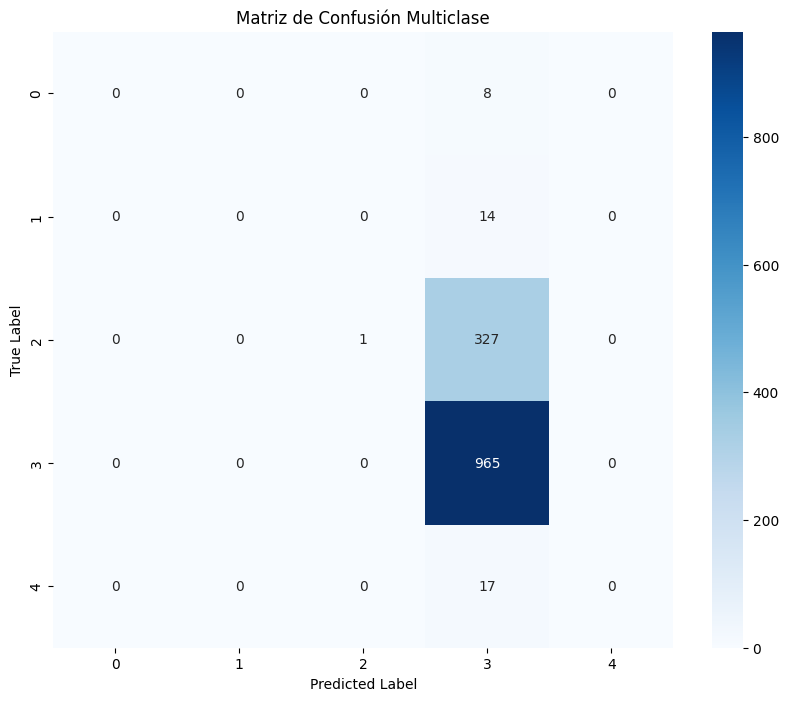

Accuracy: 0.7252252252252253

Reporte de Clasificación Multiclase:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        14
           2       1.00      0.00      0.01       328
           3       0.73      1.00      0.84       965
           4       0.00      0.00      0.00        17

    accuracy                           0.73      1332
   macro avg       0.35      0.20      0.17      1332
weighted avg       0.77      0.73      0.61      1332



c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Realizar predicciones en el conjunto de prueba
y_pred = log_reg_model.predict(X_t)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(Y_t, y_pred)

# Mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión Multiclase')
plt.show()

# Calcular y mostrar las métricas de rendimiento
print("Accuracy:", accuracy_score(Y_t, y_pred))
print("\nReporte de Clasificación Multiclase:")
print(classification_report(Y_t, y_pred))


# Métricas de Rendimiento

### **1. Accuracy**
- El modelo tiene una precisión global de **0.72 (72%)**, lo cual parece alto, pero puede ser **engañoso** debido a la distribución desigual del rendimiento por clase.

---

### **2. Precision, Recall y F1-score**
#### **Clases 0, 1 y 4:**
- Precisión, recall y F1-score son **0**, indicando que el modelo no está capturando correctamente estas categorías.

#### **Clase 3:**
- Tiene un **F1-score alto (0.83)**, lo que sugiere que el modelo está sesgado hacia esta clase en detrimento de las demás.

#### **Clase 2:**
- Su desempeño es muy bajo, con un **F1-score de solo 0.02**, indicando un bajo poder predictivo para esta categoría.

---

### **3. Conclusiones**
#### **a) Desbalance de Clases:**
- El modelo está **fuertemente influenciado por el desbalance**, prediciendo principalmente la clase 3, que es la más representada.
- Las clases con menos instancias (0, 1 y 4) no son correctamente predichas, lo cual sugiere un **sesgo significativo**.

#### **b) Capacidad Predictiva Limitada:**
- Aunque el accuracy general es del **72%**, el bajo rendimiento en términos de precisión, recall y F1-score para varias clases indica que el modelo **no es efectivo para predecir todas las categorías** de la variable objetivo.

---

# Recomendaciones

### **1. Balance de Clases**
- Aplicar técnicas como:
  - **Oversampling** (e.g., SMOTE) o **undersampling** para balancear el dataset.
  - Uso de **ponderación de clases** en el modelo para penalizar más los errores en las clases minoritarias.

### **2. Optimización del Modelo**
- Ajustar los **parámetros de regularización** para explorar configuraciones que mejoren el rendimiento.
- Considerar modelos más complejos como:
  - Árboles de decisión.
  - Bosques aleatorios.
  - Modelos de boosting (e.g., XGBoost, LightGBM).

### **3. Ajustes en la Evaluación**
- Usar métricas más específicas como:
  - **Recall por clase** para evaluar la capacidad del modelo de identificar correctamente cada categoría.
  - Ajustar el modelo en función de estas métricas.

---

### **Notas adicionales**
- La clase 3 tiene un **F1-score alto (0.83)**, lo cual indica un sesgo hacia esta clase.
- La clase 2 tiene un desempeño muy bajo, con un **F1-score de 0.02**, mostrando un bajo poder predictivo para esta categoría.

